In [1]:
import numpy as np
import scipy as sp
#panda for data reading csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt  
import csv
import array
import os
import requests
import StringIO
import zipfile
import scipy.stats 
from collections import OrderedDict
from datetime import datetime
import time
import statsmodels.api as sm

In [2]:
%matplotlib inline  
def csvConvert(file):
    result = []
    csvfile = open(file, 'rb')
    table = csv.reader(csvfile)
    for row in table:                   #Goes to each row in CSV
        result.append([])
        for i in range(0,len(row)):     #Goes to each element in row
            if row[i]=='':
                result[len(result)-1].append('N/A') #Null element transformed to Not Applicable
            else:
                result[len(result)-1].append(row[i])   #Element added
#    return result 

csvConvert('small.csv')
csvConvert('big.csv')

In [3]:
srent = pd.read_csv(open('small.csv'))
brent = pd.read_csv(open('big.csv'))

atlanta = srent[srent.Msa_Code == 12060]

In [4]:
brent.Month="01-"+ brent.Month
brent['Month']=pd.to_datetime(brent['Month'])

In [6]:
joined = pd.merge(atlanta, brent, how="inner", on=['ProjID'])
joined = joined[['ProjID','Month','Msa_Code','YearBuit','Latitude','Longitude','Rehab1','Rehab2','Rehab3','Quantity','AskingRent','ConcessionPct','AreaPerUnit' ]]
joined=joined.sort(columns="Month")

In [14]:
buildingsize=joined[['ProjID','Month','ConcessionPct','AreaPerUnit']]

In [10]:
#calculating the number of buildings only in level and quantity bins
#As you can see, it's heavily skewed right.
atlanta['area_bin']=pd.cut(atlanta['AreaPerUnit'], bins=np.arange(0,2501,500), right=False)

print pd.value_counts(atlanta['area_bin'])

[1000, 1500)    644
[500, 1000)     453
[1500, 2000)      9
[2000, 2500)      2
[0, 500)          1
dtype: int64


C:\Users\NBA507\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [12]:
areabins=sp.stats.mstats.mquantiles(atlanta['AreaPerUnit'], [0, 1./6, 2./6, 3./6, 4./6, 5./6, 1])

In [25]:
#calculating the number of buildings only in level and quantity bins
#As you can see, it's heavily skewed right.
buildingsize['area_bin']=pd.cut(buildingsize['AreaPerUnit'], bins=areabins, right=False)

print pd.value_counts(buildingsize['area_bin'])

[901.253, 973.76)       13599
[1159.642, 2118.769)    13426
[1092.586, 1159.642)    13219
[973.76, 1032.885)      13135
[1032.885, 1092.586)    12344
[454.82, 901.253)       12342
dtype: int64


C:\Users\NBA507\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


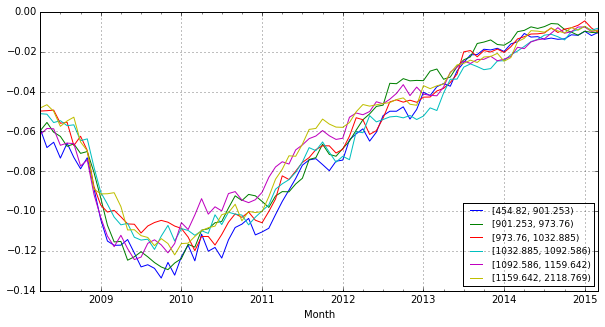

In [28]:
for k, df in buildingsize.groupby('area_bin'):
    df.groupby('Month').mean()['ConcessionPct'].plot(label=k, figsize=(10,5))
    plt.legend(loc='lower right', prop={'size':9})